In [2]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

% matplotlib inline


# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 90</p>
## <p style="text-align: center;">Due: Tues, September 18, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two systems you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer



# Question 2.a: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 3 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 3 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{3}}t^{2}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

Assume iid observations of lead times and the distribution recommended by the statistician. Let $i$ index the $i^{th}$ observation $t_i$; the likelihood of $n$ observations is given by:

\begin{align*}
\begin{split}
L(\theta) = \prod_{i = 1}^n \bigg( \frac{1}{C \theta^3} t_i^{2}\exp^{-\frac{t_i}{\theta}}\bigg)\\
\text{Taking log on both sides, we have,}\\
\log{L(\theta)} &= \sum_{i = 1}^n \bigg( \frac{1}{C \theta^3} t_i^{2}\exp^{-\frac{t_i}{\theta}}\bigg) \\
&= \sum_{i = 1}^n \bigg( 2t_i - \frac{t_i}{\theta} -C - 3\theta \bigg)\\
\text{Taking derivative w.r.t $\theta$ gives}\\
\frac{\partial \log{L(\theta)}}{\partial \theta}&= \frac{\sum_{i = 1}^n t_i }{\theta^2} - \frac{3n}{\theta} \\
\end{split}
\end{align*}
Notice that first and third terms are not functions of $\theta$ and the last term is subtracted $n$ times. Solving for $\theta$ by setting the derivative to 0, we have, 
\begin{equation*}
\theta = \frac{\sum_{i = 1}^n t_i}{3n}
\end{equation*}


Substituting $n = 10$ and $t_i$ to the observations provided, we have, $\theta = 0.96$.

Note the distribution used to model lead times is called a gamma distribution. The distribution is a generalization to the exponential distribution (usually used to model inter-arrival times between events modeled as a Poisson process. Sum of 3 inter-arrival times will be Gamma with k=3, which is what I substituted in the (two parameter) Gamma distribution. You can read the details here: https://en.wikipedia.org/wiki/Gamma_distribution.

# Question 2.b: Bivariate Normal Distribution (10 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

## Answer


### a) Contour Plots

(4 pts) Obtain contour plots for each of the two distributions using  Python (https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

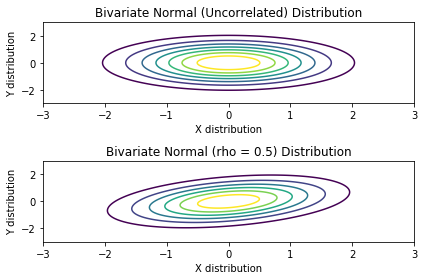

In [3]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(-3,3,500)
y = np.linspace(-3,3,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
covar_1 = [[1,0],[0,1]]
covar_2 = [[1,0.5],[0.35,1]]
mn_1 = multivariate_normal([0,0], covar_1)
mn_2 = multivariate_normal([0,0], covar_2)
plt.subplot(2,1,1)
plt.contour(X,Y, mn_1.pdf(pos))
plt.title("Bivariate Normal (Uncorrelated) Distribution")
plt.xlabel("X distribution")
plt.ylabel("Y distribution")
plt.subplot(2,1,2)
plt.contour(X,Y, mn_2.pdf(pos))
plt.title("Bivariate Normal (rho = 0.5) Distribution")
plt.xlabel("X distribution")
plt.ylabel("Y distribution")
plt.tight_layout()

### b) 3D Plot from two different views

(3 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

#### 1. Uncorrelated Distribution

Elevation: 30
Azimuth: -60


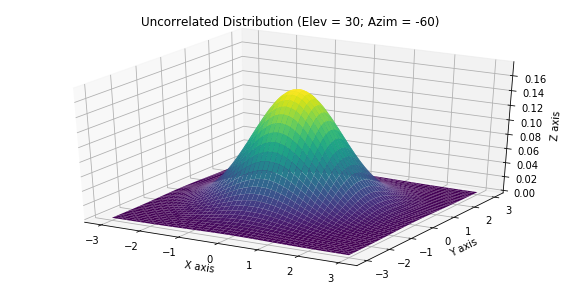

In [4]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mn_1.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
print("Elevation: " + str(ax.elev))
print("Azimuth: " + str(ax.azim))
ax.auto_scale_xyz([-3, 3], [-3, 3], [0, 0.175])
plt.title("Uncorrelated Distribution (Elev = 30; Azim = -60)")
plt.show()

Elevation: 40
Azimuth: 0


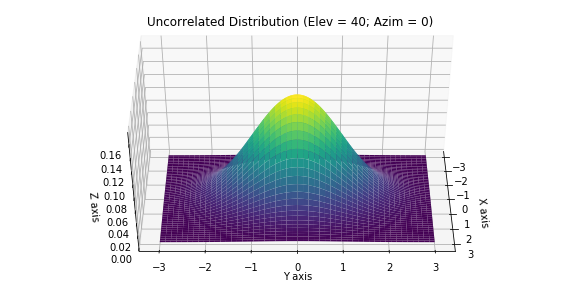

In [5]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mn_1.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.elev = 40
ax.azim = 0
print("Elevation: " + str(ax.elev))
print("Azimuth: " + str(ax.azim))
ax.auto_scale_xyz([-3, 3], [-3, 3], [0, 0.175])
plt.title("Uncorrelated Distribution (Elev = 40; Azim = 0)")
plt.show()

#### 2. Correlated Distribution (rho = 0.5)

Elevation: 30
Azimuth: -60


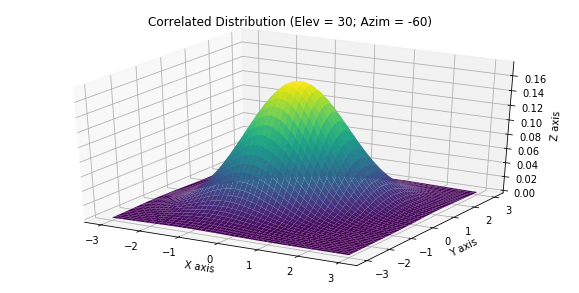

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mn_2.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
print("Elevation: " + str(ax.elev))
print("Azimuth: " + str(ax.azim))
ax.auto_scale_xyz([-3, 3], [-3, 3], [0, 0.175])
plt.title("Correlated Distribution (Elev = 30; Azim = -60)")
plt.show()

Elevation: 40
Azimuth: 0


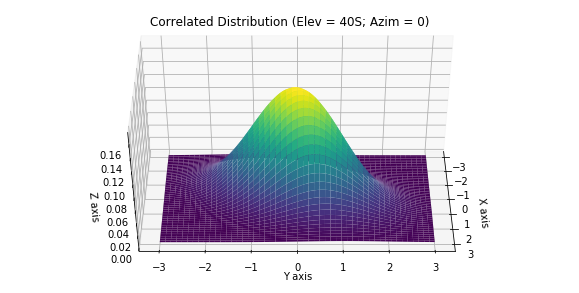

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mn_2.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.elev = 40
ax.azim = 0
print("Elevation: " + str(ax.elev))
print("Azimuth: " + str(ax.azim))
ax.auto_scale_xyz([-3, 3], [-3, 3], [0, 0.175])
plt.title("Correlated Distribution (Elev = 40S; Azim = 0)")
plt.show()

### c) Rotated Distribution from part ii

(3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

Elevation: 30
Azimuth: 0


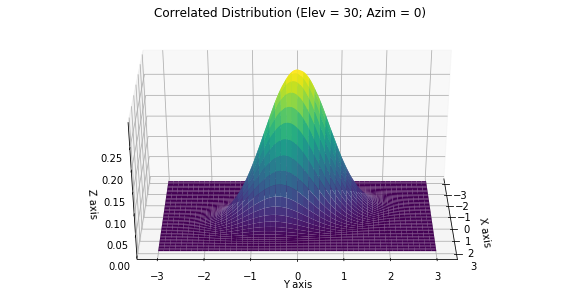

In [28]:
theta = (-45*np.pi)/180

rot = [[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]]
cov = np.transpose(rot) * mn_2.cov * rot
mn_3 = multivariate_normal([0,0], cov)

fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, mn_3.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.elev = 30
ax.azim = 0
print("Elevation: " + str(ax.elev))
print("Azimuth: " + str(ax.azim))
ax.auto_scale_xyz([-3, 3], [-3, 3], [0, .3])
plt.title("Correlated Distribution (Elev = 30; Azim = 0)",y=1.08)
plt.show()



# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import data that can be used for predicted the popularity of online news articles.



In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# load database
data = pd.read_csv('data_q3.csv')

# show the first 5 rows of DB
pd.DataFrame.head(data)

,n_tokens_title,log_n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,sqrt_num_hrefs,sqrt_num_self_hrefs,sqrt_num_imgs,sqrt_num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,log_shares
0,12,5.662960,0.589474,0.726190,2.236068,1.414214,0.0,0.0,4.381944,6,...,0.166667,1.0,-0.366667,-0.80,-0.10,0.0,0.0,0.5,0.0,6.626718
1,10,6.025866,0.606796,0.777344,2.828427,0.000000,1.0,0.0,4.980676,6,...,0.100000,0.5,-0.176128,-0.70,-0.05,0.3,0.2,0.2,0.2,6.148468
2,11,4.897840,0.702290,0.785714,2.000000,1.414214,3.0,0.0,4.477612,10,...,0.136364,0.8,-0.150000,-0.15,-0.15,0.0,0.0,0.5,0.0,8.433812
3,11,5.638355,0.610714,0.766467,2.236068,2.000000,1.0,0.0,4.608541,4,...,0.136364,0.5,-0.278472,-0.50,-0.05,0.0,0.0,0.5,0.0,7.170120
4,12,6.212606,0.513026,0.662252,3.741657,1.000000,1.0,0.0,5.084168,10,...,0.100000,0.5,-0.235000,-0.50,-0.10,0.3,0.0,0.2,0.0,7.090077


In [9]:
# build inputs (features) and output
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# standardization (rendering data zero mean and standard deviation 1)
X_norm = (X - X.mean()) / X.std()

# split DB into training-set and test-set
msk = np.random.rand(len(data)) < 0.8
X_train = X_norm[msk]
y_train = y[msk]

X_test = X_norm[~msk]
y_test = y[~msk]

## (a)

(5 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [10]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)
print("Regression coeficcients are: ")
reg.coef_

Regression coeficcients are: 


array([ 1.62007249e-03, -1.10859379e-01, -7.05909434e-01,  1.41153251e-01,
        4.81307203e-02, -3.02836229e-02,  2.23321823e-02,  3.94726488e-02,
       -8.21516080e-02,  3.97250525e-03, -7.59238935e-06, -3.46508771e-04,
       -5.62429744e-07, -8.44414142e-02,  7.62587664e-01,  1.04142196e-03,
       -3.58246684e-04,  1.69618685e-03,  2.61826697e-01,  4.38432397e-02,
       -3.46291650e-02, -2.21313106e-02,  1.04926833e-03,  3.66897251e-02,
        4.82377183e-01, -3.40403863e-01, -1.19223670e+00,  6.08660517e-02,
        5.41817072e-01,  2.86861169e-02, -1.93428952e-01, -1.93625595e-02,
        1.07205805e-01, -4.26390743e-02,  1.86797437e-02,  5.95175774e-02,
        7.57413517e-02,  1.28434604e-01,  3.17879634e-02])

In [11]:
y_pred = reg.predict(X)
print("MSE: " + str(mean_squared_error(y_pred,y)))

MSE: 0.751722007985847


## (b)  
5 pts) Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively. Compare the two MSE values.

In [12]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("MSE: " + str(mean_squared_error(y_pred,y_test)))

MSE: 0.7627194222238722


## (c) 
(5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

Text(0.5,1,'Scatterplot of residuals')

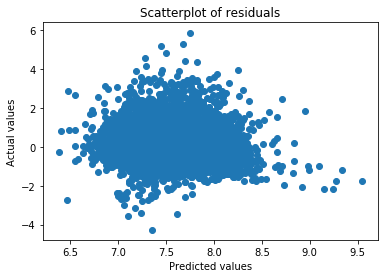

In [13]:
plt.scatter(y_pred, y_test-y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of residuals")

Mean: -0.016900193959866375
Standard deviation: 0.8731745562417581


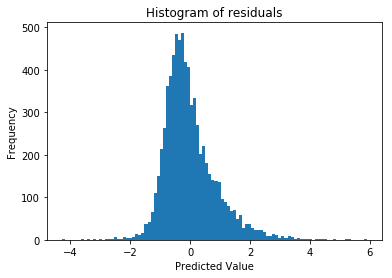

In [14]:
residuals = y_test - y_pred
plt.hist(residuals, bins=100)
plt.xlabel("Predicted Value")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
print("Mean: " + str(np.mean(residuals)))
print("Standard deviation: " + str(np.std(residuals)))

Yes, the MLR model is reasonable because the points appear to be symmetrically distributed and cluster toward the middle of the scatter plot. They are clustered around the lower single digits of the y axis, and there are no clear patterns in the distribution.

When plot the residuals as a histogram, we can see that the variance is relatively small, and the mean is very close to zero, so the model fits well.

## (d)
(5 pts) Identify and list the the three most siginificant features. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

In [15]:
from sklearn.feature_selection import RFE
selector = RFE(reg, 3, step=1)
selector = selector.fit(X, y)
# selector.support_
selector.ranking_

array([31,  9,  1, 19, 18, 29, 24, 23, 17, 28, 36, 34, 37, 25,  1, 30, 35,
       32,  2, 22, 12, 13, 33, 21,  1,  5,  7, 10,  3, 14,  4, 27, 15, 16,
       26, 11,  6,  8, 20])

In [16]:
features = []
for i in range(len(selector.ranking_)):
    if(selector.ranking_[i] == 1):
        print("Important feature at index: " + str(i))

Important feature at index: 2
Important feature at index: 14
Important feature at index: 24


The 3 most important features are at indices: 2, 14, and 24.

## (e) 
(5 pts) Build a new MLR model using only the three most significant features. Again, use 80% of the data for training and the remaining 20% for testing. Then, Compare the test set MSE values from (b) and (e). Please explain what you observe.

In [17]:
# build inputs (features) and output
X = data.iloc[:, [2,14,24]]
y = data.iloc[:,-1]

# standardization (rendering data zero mean and standard deviation 1)
X_norm = (X - X.mean()) / X.std()

# split DB into training-set and test-set
msk = np.random.rand(len(data)) < 0.8
X_train = X_norm[msk]
y_train = y[msk]

X_test = X_norm[~msk]
y_test = y[~msk]

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("MSE: " + str(mean_squared_error(y_pred,y_test)))


MSE: 0.7765700714881723


The MSE of e) increased with respect to that of (b) and (e). The tradeoff that occurred was a simplification of our model with a loss of precision by our estimator.

## Answer



# Question 4: Ridge and Lasso Regression (25 points)
Use the following codes to import the already-standardized data.

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# load database
filename = "data_q4.csv"
data = pd.read_csv(filename)

X = data.values[:,0:8]
y = data.values[:,-1]

The dataset consists of eight features and one target variable.

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 44 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using the sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=20)

## a)
(8pts) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-5}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-5,100)

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. 

**Cross Validation Using Lasso**

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

X = X_train
y = y_train

alphas = 10**np.linspace(10,-5,100)

n_folds = 5

k_fold = KFold(n_folds)

mse = []
k_alphas = []
lasso_coeffs = []

print("Cross validation using Lasso\n")
for alpha in alphas:
#     print("alpha = " + str(alpha))
    for k, (train, test) in enumerate(k_fold.split(X, y)):
        lasso = Lasso(alpha=alpha,tol=0.0001)
        lasso.fit(X[train], y[train])
        # perform a prediction and validate it
        y_pred = lasso.predict(X[test])
        mse.append(mean_squared_error(y[test],y_pred))
        k_alphas.append(alpha)
        lasso_coeffs.append(lasso.coef_)
#         print(lasso.coef_)
#         print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
#               format(k, alpha, mean_squared_error(y[test],y_pred)))
#     print("\n")

min_mse = np.amin(np.absolute(mse))
lasso_index = 0
for i in range(len(mse)):
    if(np.isclose(mse[i], min_mse, rtol=1e-05, atol=1e-08, equal_nan=False)):
        lasso_index = i

lasso_alpha = k_alphas[lasso_index]
print("\nBest Alpha is {:.5f}".format(lasso_alpha))

Cross validation using Lasso


Best Alpha is 0.02154


**Cross Validation using Ridge**

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

X = X_train
y = y_train

alphas = 10**np.linspace(10,-5,100)

n_folds = 5

k_fold = KFold(n_folds)

mse = []
k_alphas = []
ridge_coeffs = []

print("Cross validation using Ridge\n")
for alpha in alphas:
#     print("alpha = " + str(alpha))
    for k, (train, test) in enumerate(k_fold.split(X, y)):
        ridge = Ridge(alpha=alpha,tol=0.0001)
        ridge.fit(X[train], y[train])
        # perform a prediction and validate it
        y_pred = ridge.predict(X[test])
        mse.append(mean_squared_error(y[test],y_pred))
        k_alphas.append(alpha)
        ridge_coeffs.append(ridge.coef_)
#         print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
#               format(k, alpha, mean_squared_error(y[test],y_pred)))
#     print("\n")
    
min_mse = np.amin(mse)
ridge_index = 0
for i in range(len(mse)):
    if(np.isclose(mse[i], min_mse, rtol=1e-05, atol=1e-08, equal_nan=False)):
        ridge_index = i

ridge_alpha = k_alphas[ridge_index]
print("\nBest Alpha is {:.5f}".format(ridge_alpha))

Cross validation using Ridge


Best Alpha is 132.19411


## b) 
(8pts) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 

In [54]:
mse = []
ridge_coeffs = []
lasso_coeffs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # perform a prediction and validate it
    y_pred = ridge.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    ridge_coeffs.append(ridge.coef_)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    # perform a prediction and validate it
    y_pred = lasso.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    lasso_coeffs.append(lasso.coef_)
    

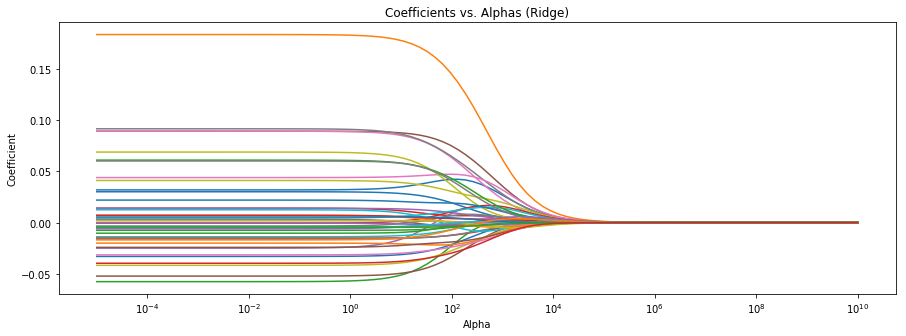

In [55]:
beta = []

y_axis = 5
x_axis = 15

for x in range(len(ridge_coeffs[0])):
    beta_x = []
    for y in range(len(ridge_coeffs)):
        beta_x.append(ridge_coeffs[y][x])

    beta.append(beta_x)    

for i in range(len(ridge_coeffs[0])):
    lin = 10**np.linspace(10,-5,len(beta[i]))
    plt.plot(lin,beta[i])
    fig_size = [x_axis,y_axis]
    plt.rcParams["figure.figsize"] = fig_size
    plt.xscale('log')
    plt.title("Coefficients vs. Alphas (Ridge)")
    plt.xlabel("Alpha")
    plt.ylabel("Coefficient");

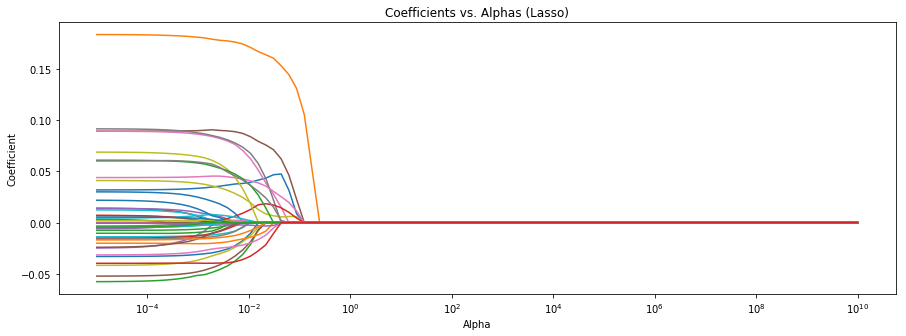

In [56]:
beta = []

for x in range(len(lasso_coeffs[0])):
    beta_x = []
    for y in range(len(lasso_coeffs)):
        beta_x.append(lasso_coeffs[y][x])

    beta.append(beta_x)    

for i in range(len(lasso_coeffs[0])):
    lin = 10**np.linspace(10,-5,len(beta[i]))
    plt.plot(lin,beta[i])
    fig_size = [x_axis,y_axis]
    plt.rcParams["figure.figsize"] = fig_size
    plt.xscale('log')
    plt.title("Coefficients vs. Alphas (Lasso)")
    plt.xlabel("Alpha")
    plt.ylabel("Coefficient");

We can observe that as we increase the value of the regularization parameter, the values of the coefficients appear to converge to zero.

## c) 
(5pts) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. 

**Least Squares Regression**

In [26]:
lsr = linear_model.LinearRegression()
lsr.fit(X_train,y_train)
y_pred = lsr.predict(X_test)
print("MSE: " + str(mean_squared_error(y_pred,y_test)))

MSE: 0.16962131299962507


**Ridge Regression**

In [27]:
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print("MSE: " + str(mean_squared_error(y_pred,y_test)))

MSE: 0.16005156408686164


**Lasso Regression**

In [28]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print("MSE: " + str(mean_squared_error(y_pred,y_test)))

MSE: 0.15528685787928237


## d) 
(4pts) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficients for 65 variables. What do you observe from these coefficients? 

Cross validation using LassoCV

Best Alpha is 0.01708


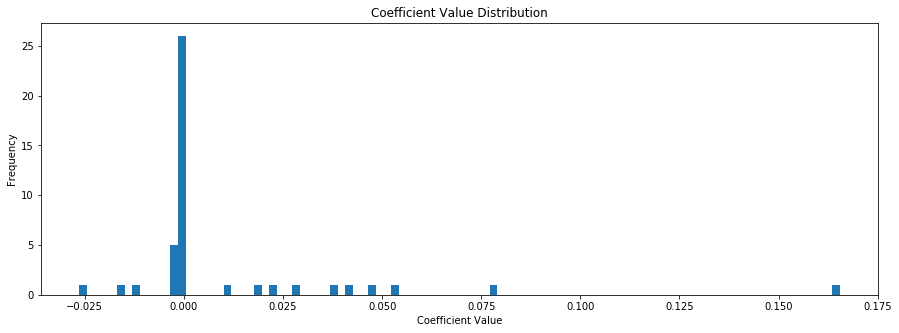

In [84]:
from sklearn.linear_model import LassoCV

X = X_train
y = y_train
    
alphas = 10**np.linspace(10,-5,100)

print("Cross validation using LassoCV\n")
lassoCV = LassoCV(alphas=None, cv=10, max_iter=10000)
lassoCV.fit(X, y)

print("Best Alpha is {:.5f}".format(lassoCV.alpha_))

lasso = Lasso(alpha=lassoCV.alpha_,tol=0.0001)
lasso.fit(X,y)

plt.hist(lasso.coef_, bins = 100, align='mid');
plt.xlabel("Coefficient Value");
plt.ylabel("Frequency");
plt.title("Coefficient Value Distribution");

Most of the coefficients are centered around 0, meaning the vast majority of the input data columns have little effect on our Lasso estimator.

# Question 5 (10 pts)
Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer